<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C1/W4/image_data_generator_compressed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Download Dataset

In [2]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!mkdir -p ./data/train
!unzip -q horse-or-human.zip -d data/train
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142M  100  142M    0     0   135M      0  0:00:01  0:00:01 --:--:--  135M
data  horse-or-human.zip  sample_data


In [3]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
!mkdir -p ./data/validation
!unzip -q validation-horse-or-human.zip -d ./data/validation
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  52.1M      0 --:--:-- --:--:-- --:--:-- 52.1M
data  horse-or-human.zip  sample_data  validation-horse-or-human.zip


# Load the Data

In [43]:
target_size=(150, 150)

In [44]:
def get_train_gen():
  train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()
  train_gen = train_data_gen.flow_from_directory(directory='./data/train',target_size=target_size, color_mode='rgb', class_mode='binary', batch_size=32)
  return train_gen
get_train_gen()

Found 1027 images belonging to 2 classes.


In [45]:
def get_val_gen():
  val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()
  val_gen = val_data_gen.flow_from_directory(directory='./data/validation', target_size=target_size,
                                              color_mode='rgb', class_mode='binary', batch_size=32)
  return val_gen
get_val_gen()

Found 256 images belonging to 2 classes.


# Visualize the images

In [46]:
train_gen = get_train_gen()

Found 1027 images belonging to 2 classes.


In [47]:
train_gen.filenames[:10]

['horses/horse01-0.png',
 'horses/horse01-1.png',
 'horses/horse01-2.png',
 'horses/horse01-3.png',
 'horses/horse01-4.png',
 'horses/horse01-5.png',
 'horses/horse01-6.png',
 'horses/horse01-7.png',
 'horses/horse01-8.png',
 'horses/horse01-9.png']

In [48]:
indices_class = {v:k for k,v in train_gen.class_indices.items()}
indices_class

{0: 'horses', 1: 'humans'}

In [49]:
images = next(train_gen)

In [50]:
images[0].shape, images[1].shape

((32, 150, 150, 3), (32,))

In [51]:
images[0][0]

array([[[150., 198., 255.],
        [148., 198., 255.],
        [150., 198., 255.],
        ...,
        [168., 151., 144.],
        [174., 155., 147.],
        [175., 156., 149.]],

       [[149., 199., 255.],
        [150., 199., 255.],
        [151., 199., 255.],
        ...,
        [174., 156., 148.],
        [175., 154., 147.],
        [172., 152., 147.]],

       [[153., 200., 255.],
        [153., 199., 255.],
        [152., 199., 255.],
        ...,
        [169., 151., 147.],
        [169., 150., 145.],
        [171., 150., 144.]],

       ...,

       [[230., 195., 163.],
        [230., 195., 164.],
        [232., 196., 167.],
        ...,
        [226., 190., 158.],
        [222., 188., 156.],
        [218., 184., 151.]],

       [[231., 194., 160.],
        [233., 198., 165.],
        [229., 194., 161.],
        ...,
        [232., 196., 167.],
        [224., 190., 159.],
        [215., 182., 148.]],

       [[226., 191., 158.],
        [228., 193., 162.],
        [223., 1

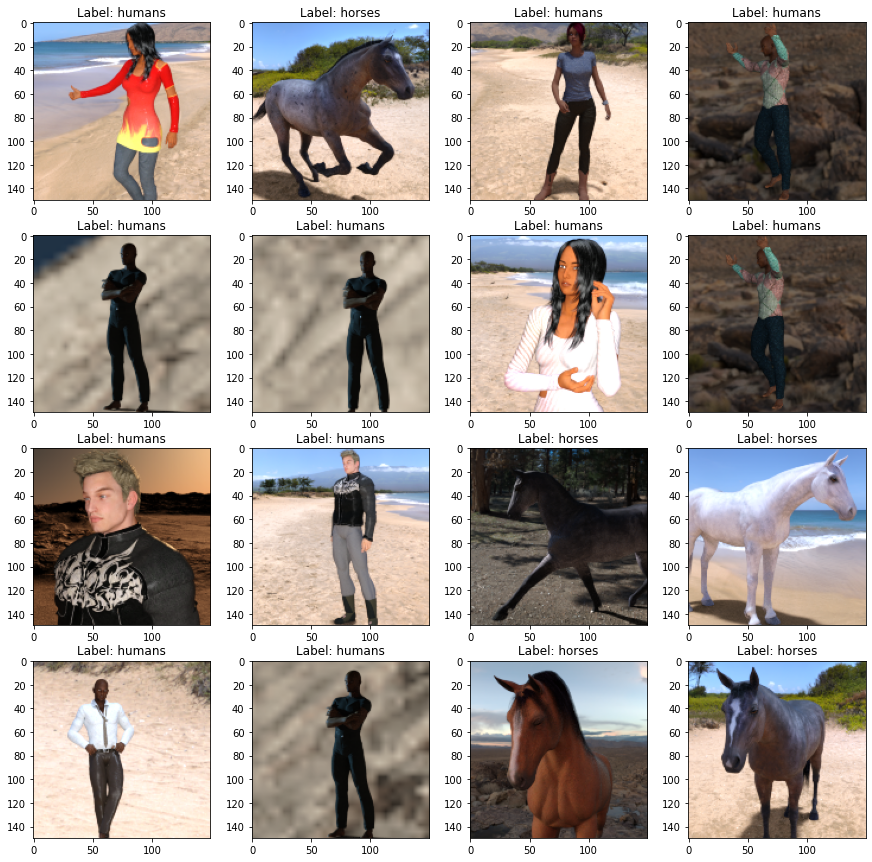

In [52]:
fig, axs = plt.subplots(4,4, figsize=(15,15))
for i in range(16):
  ax = axs[int(i/4), i%4]
  cur_image = np.array(images[0][i], dtype=np.uint8)
  ax.imshow(cur_image)
  ax.set_title(f'Label: {indices_class[images[1][i]]}')

In [53]:
train_gen = get_train_gen()
val_gen = get_val_gen()

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Neural Network

In [54]:
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape = images[0][0].shape),
              tf.keras.layers.Rescaling(scale = 1/255),
              # Conv layer
              tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # Conv layer
              tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # # Conv layer
              # tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # # Conv layer
              # tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
              # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
              # flatten
              tf.keras.layers.Flatten(),
              # Dense
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dense(units=1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)       

# Train

In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
33/33 [==============================] - 8s 219ms/step - loss: 0.7654 - accuracy: 0.7858 - val_loss: 2.7666 - val_accuracy: 0.6523
Epoch 2/10
33/33 [==============================] - 7s 212ms/step - loss: 0.3103 - accuracy: 0.9017 - val_loss: 1.5709 - val_accuracy: 0.7656
Epoch 3/10
33/33 [==============================] - 7s 213ms/step - loss: 0.0677 - accuracy: 0.9825 - val_loss: 1.7048 - val_accuracy: 0.8008
Epoch 4/10
33/33 [==============================] - 7s 214ms/step - loss: 0.0907 - accuracy: 0.9698 - val_loss: 2.5688 - val_accuracy: 0.8047
Epoch 5/10
33/33 [==============================] - 7s 213ms/step - loss: 0.1053 - accuracy: 0.9737 - val_loss: 1.1511 - val_accuracy: 0.8672
Epoch 6/10
33/33 [==============================] - 7s 217ms/step - loss: 0.1524 - accuracy: 0.9747 - val_loss: 2.0302 - val_accuracy: 0.8359
Epoch 7/10
33/33 [==============================] - 7s 213ms/step - loss: 0.0638 - accuracy: 0.9873 - val_loss: 3.7179 - val_accuracy: 0.7305
Epoch 

# Predict for new image

In [56]:
from google.colab import files
uploaded_files = files.upload()
for file in uploaded_files:
  i = tf.keras.preprocessing.image.load_img(file, color_mode='rgb', target_size = target_size)
  x = tf.keras.preprocessing.image.img_to_array(i)
  x  = np.expand_dims(x, axis=0)
  y = model.predict(x)
  label = 0
  if y[0]>0.5:
    label =1
  print(f"file {file} : {indices_class[label]}")

  


Saving woman-gf0b48f192_640.jpg to woman-gf0b48f192_640 (2).jpg
Saving horse-ga069db136_640.jpg to horse-ga069db136_640 (1).jpg
file woman-gf0b48f192_640.jpg : humans
file horse-ga069db136_640.jpg : horses


# Visualize Intermediate Layer Outputs

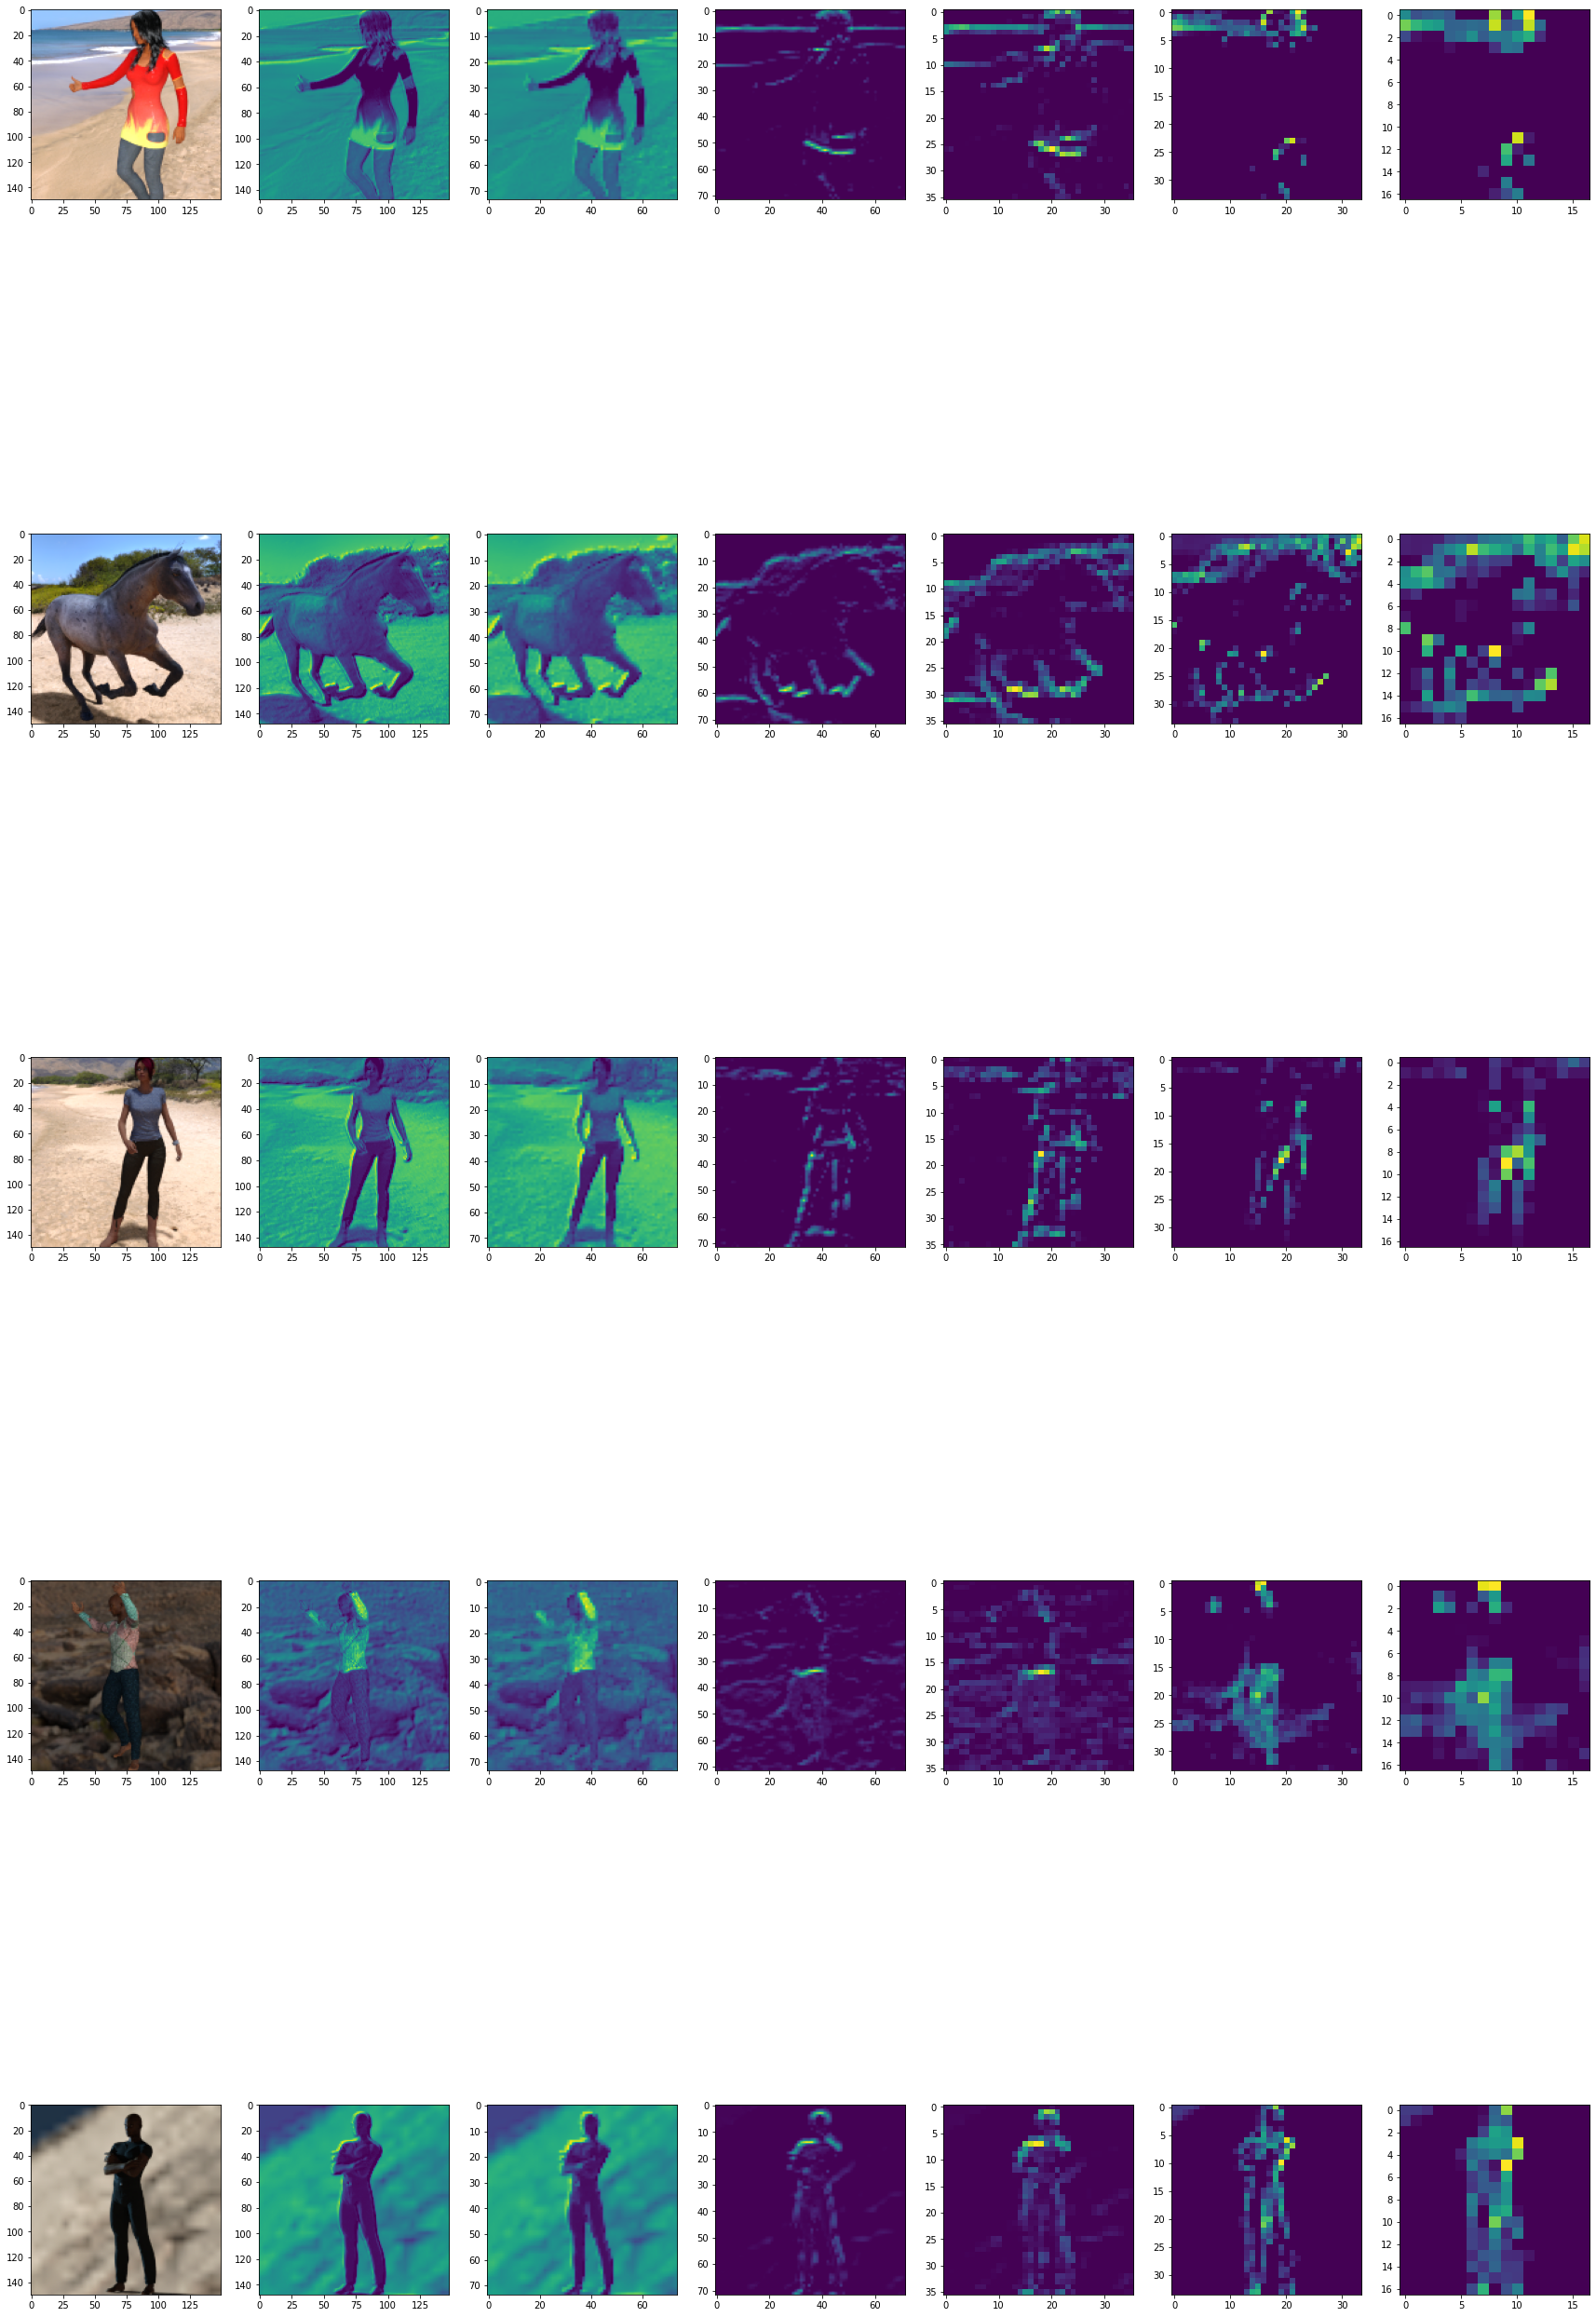

In [58]:
inputs = model.input
layer_outputs = [layer.output for layer in model.layers]
int_model = tf.keras.Model(inputs=inputs, outputs = layer_outputs)
num_of_images = 5
layer_inds = list(range(0,7))
layer_inds_len = len(layer_inds)
fig, axs = plt.subplots(nrows = num_of_images, ncols = layer_inds_len, figsize=(30,50))
for img_ind in range(num_of_images):
  for l_ind in range(layer_inds_len):
    layer_ind = layer_inds[l_ind]
    ax = axs[img_ind, l_ind]
    out_image = int_model(images[0][[img_ind]])[layer_ind]
    if layer_ind == 0:
      ax.imshow(out_image[0,:,:,:])
    else:
      ax.imshow(out_image[0,:,:,0])
